In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_FILE = '/media/sebo-hri-lab/DATA/OpenFace/group_CD_camera2_trim.csv'


GAZE_ANGLE_X = ' gaze_angle_x'
GAZE_ANGLE_Y = ' gaze_angle_y'
GAZE_0_X = ' gaze_0_x'
GAZE_0_Y = ' gaze_0_y'
GAZE_0_Z = ' gaze_0_z'
GAZE_1_X = ' gaze_1_x'
GAZE_1_Y = ' gaze_1_y'
GAZE_1_Z = ' gaze_1_z'

FRAME_WIDTH = 640
FRAME_HEIGHT = 480

SyntaxError: invalid syntax (<ipython-input-42-6c114a01183b>, line 14)

In [34]:
df = pd.read_csv(CSV_FILE)


In [35]:
def edge_projection(row, frame_shape):
    # frame shape is (width, height)

    x_plane_normal = np.array([1, 0, 0])

    if row[GAZE_0_X] > 0:
        # participant is looking right
        x_plane_point = np.array([frame_shape[0], 0, 0])
    else:
        # participant is looking left
        x_plane_point = np.array([0, 0, 0])

    y_plane_normal = np.array([0, 1, 0])
    
    if row[GAZE_0_Y] > 0:
        # participant is looking down
        y_plane_point = np.array([0, frame_shape[1], 0])
    else:
        # participant is looking up
        y_plane_point = np.array([0, 0, 0])

    line_point = np.array([row[' eye_lmk_x_0'], row[' eye_lmk_y_0'], 0])

    line_vector = np.array([row[GAZE_0_X], row[GAZE_0_Y], row[GAZE_0_Z]])

    x_t = np.dot((x_plane_point - line_point), x_plane_normal) / np.dot(line_vector, x_plane_normal)

    y_t = np.dot((y_plane_point - line_point), y_plane_normal) / np.dot(line_vector, y_plane_normal)

    if np.abs(x_t) < np.abs(y_t):
        # gaze falls on the left/right edge
        return (line_point + line_vector * x_t).astype(int)
    else:
        # gaze falls on the upper/lower edge
        return (line_point + line_vector * y_t).astype(int)

In [36]:
vectorList = np.zeros((len(df),2))
for index, row in df.iterrows():
    if(row[GAZE_ANGLE_X] or row[GAZE_ANGLE_Y]):
        res = edge_projection(row,(FRAME_WIDTH,FRAME_HEIGHT))
        vectorList[index] = res[0],res[1]#[row[GAZE_0_X], row[GAZE_0_Y], row[GAZE_0_Z], row[GAZE_1_X], row[GAZE_1_Y], row[GAZE_1_Z]]

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch

In [ ]:
clusters = KMeans(n_cluster=6,random_state=None).fit(vectorList)
predictions = clusters.predict(vectorList)

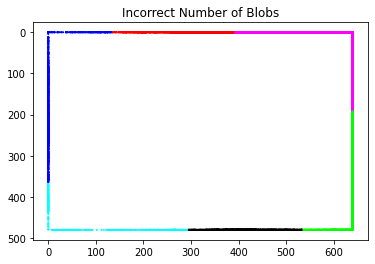

In [39]:
colors = np.array([(0,0,1),(0,1,0),(1,0,1),(0,1,1),(1,0,0),(0,0,0)])
plt.scatter(vectorList[:, 0], vectorList[:, 1], c=colors[predictions], s=1)
plt.title("Incorrect Number of Blobs")
plt.gca().invert_yaxis()
plt.savefig('class.png')

In [41]:
import cv2
#For Debug display only
VIDEO_FILE = "/media/sebo-hri-lab/DATA/Trimmed_Videos/group_CD_camera2_trim.mp4"

cap = cv2.VideoCapture(VIDEO_FILE)
i = 0
colors = [(255,0,0),(0,255,0),(255,0,255),(255,255,0),(0,0,255),(255,100,0)]
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
BOX_RADIUS = 30
#out = cv2.VideoWriter('classificationExaaze.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 100, (frame_width,frame_height))
while True:
    _, frame = cap.read()
    row = df.iloc[i]
    if(row[GAZE_ANGLE_X] or row[GAZE_ANGLE_Y]):
        #vec = [edge_projection(row,(frame_width, frame_height))]#[[row[GAZE_0_X], row[GAZE_0_Y],row[GAZE_0_Z], row[GAZE_1_X], row[GAZE_1_Y], row[GAZE_1_Z]]]
    #, row[' gaze_0_x'], row[' gaze_0_y'], row[' gaze_0_z'], row[' gaze_1_x'], row[' gaze_1_y'], row[' gaze_1_z']]]
        gaze_target = edge_projection(row, (frame_width, frame_height))
        vec = [[gaze_target[0], gaze_target[1]]]
        clus = clusters.predict(vec)[0]
        cv2.rectangle(frame,(gaze_target[0]-BOX_RADIUS,gaze_target[1]-BOX_RADIUS),(gaze_target[0]+BOX_RADIUS,gaze_target[1]+BOX_RADIUS),colors[clus],2)
        #out.write(frame)
    cv2.imshow('my image', frame)
    i+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
#out.release()
cv2.destroyAllWindows()


NameError: name 'kmeans' is not defined

In [25]:
#COMPARING CLUSTER ALGORITHMS

SELECTED_CLUSTERS = ['KMeans', 'DBSCAN', 'OPTICS', 'AC-Ward', 'AC-Complete', 'AC-Average', 'AC-Single', 'BIRCH']; 

N_CLUSTERS = 6
def fitClusters(clusterName,vectorList):
    print('Clustering with ' + clusterName)
    if clusterName == 'KMeans':
         res = KMeans(n_clusters=N_CLUSTERS, random_state=0).fit(vectorList)
    elif clusterName == 'DBSCAN':
         res = DBSCAN(eps=5, min_samples=5).fit(vectorList)
    elif clusterName == 'OPTICS':
         res=OPTICS(min_samples=2).fit(vectorList)
    elif clusterName == 'BIRCH':
         res =Birch(n_clusters=N_CLUSTERS).fit(vectorList)
    elif clusterName == 'AC-Ward' :
         res =AgglomerativeClustering(linkage='ward').fit(vectorList)
    elif clusterName == 'AC-Average':
         res = gglomerativeClustering(linkage='average').fit(vectorList)
    elif clusterName == 'AC-Single':
         res = AgglomerativeClustering(linkage='single').fit(vectorList)
    elif clusterName == 'AC-Complete' :
         res =AgglomerativeClustering(linkage='complete').fit(vectorList)
    return res



In [12]:
print(frame_width)
print(frame_height)

640
480
